In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import count
from IPython.display import display

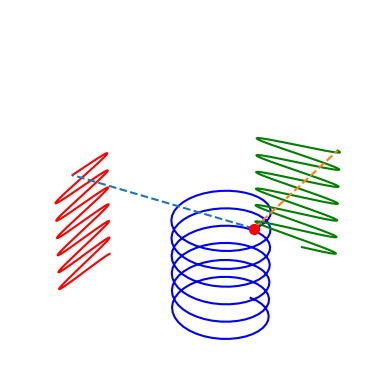

C:\Users\zhangjx\AppData\Local\Temp\ipykernel_36620\290468421.py:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x_track[-1:, 0], x_track[-1:, 1], x_track[-1:, 2], cmap='spectral', c='r', s=50)


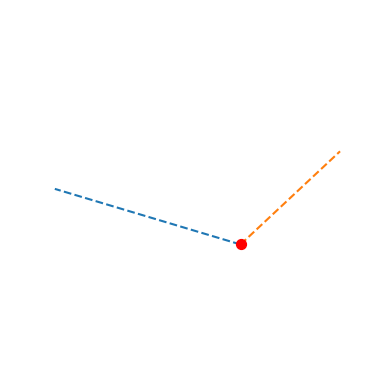

KeyboardInterrupt: 

In [2]:
x_track = np.zeros((1, 3))
x_track_s = np.array([.0,.0,.0])
theta = 0
def gen_path(): # 生成螺旋
    global x_track_s,x_track,theta
    theta += 10*np.pi/180
    x = 6*np.sin(theta)
    y = 6*np.cos(theta)
    x_track_s[:-1] =[x,y]
    x_track_s[-1] += 0.1
    x_track = np.append(x_track, [x_track_s],axis=0)
    return x_track
fig=plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('3d_mobile_obs')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
display(fig, display_id='plot')

num = 20
for t in count():
    if t == 1000:
        break
    # plt.cla() # 此命令是每次清空画布，所以就不会有前序的效果
    ax.clear()
    x_track = gen_path()
    ax.plot3D(x_track[1:, 0], x_track[1:, 1], x_track[1:, 2], 'blue')
    ax.plot3D(np.zeros(t+1)-num, x_track[1:, 1], x_track[1:, 2], 'red')
    ax.plot3D(x_track[1:, 0], np.zeros(t+1)+num, x_track[1:, 2], 'green')

    ax.plot3D(np.concatenate([x_track[-1:, 0],np.zeros(1)-num]), 
              np.concatenate([x_track[-1:, 1],x_track[-1:, 1]]),
              np.concatenate([x_track[-1:, 2],x_track[-1:, 2]]),linestyle='--')
    
    ax.plot3D(np.concatenate([x_track[-1:, 0],x_track[-1:, 0]]), 
              np.concatenate([x_track[-1:, 1],np.zeros(1)+num]),
              np.concatenate([x_track[-1:, 2],x_track[-1:, 2]]),linestyle='--')
    ax.scatter(x_track[-1:, 0], x_track[-1:, 1], x_track[-1:, 2], cmap='spectral', c='r', s=50)
    ax.set_zlim(x_track[-1, 2]-20,x_track[-1, 2]+12)
    ax.axis('off')
    ax.grid(False)
    display(fig, display_id='plot',update=True)
    plt.pause(0.01)

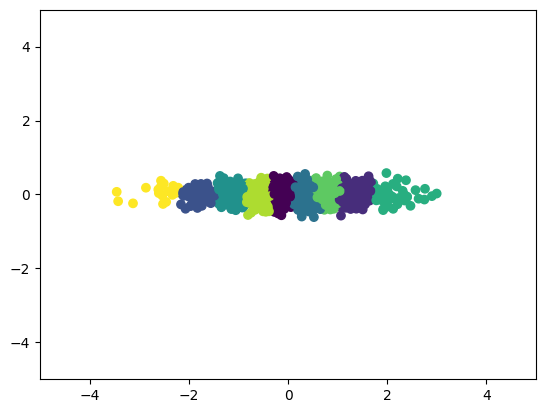

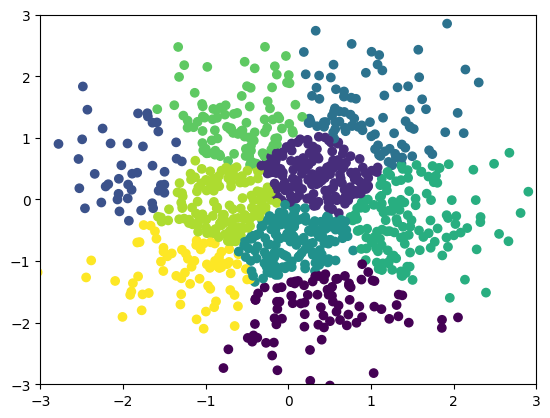

In [14]:




# 生成一组二维数据，数据呈现高斯分布
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n=1000):
    x = np.random.normal(0, 1, n)
    y = np.random.normal(0, 1, n)
    return x, y

x, y = generate_data()
y = y * 0.2
# 聚类
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=9)
kmeans.fit(np.array(list(zip(x, y))))
labels = kmeans.labels_

# 绘制散点图
# 固定坐标轴范围
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.scatter(x, y, c=labels)
plt.show()
# 除以标准差
x = x / np.std(x)
y = y / np.std(y)

# 聚类
kmeans = KMeans(n_clusters=9)
kmeans.fit(np.array(list(zip(x, y))))
labels = kmeans.labels_

# 绘制散点图
# 固定坐标轴范围
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.scatter(x, y, c=labels)
plt.show()